In [2]:
# import vulnerability data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
%matplotlib inline

vulnerability_data = pd.read_csv('vulnerabilityroadN1.csv')
trafficperlane = pd.read_csv('trafficperlaneN1.csv')
traffic = trafficperlane[['heavyTruck','mediumTruck','smallTruck']]

economic_vulnerability = vulnerability_data['TotalEconomicVulnerability'].tolist()
chainage = vulnerability_data['chainage'].tolist()

road_segments = []
for segment in chainage:
    round_segment = round(segment,1)
    road_segments.append(round_segment)
    
HeavyTrucks = traffic[['heavyTruck']]
MediumTrucks = traffic[['mediumTruck']]
SmallTrucks = traffic[['smallTruck']]

part_vulnerability = economic_vulnerability[0:100]
part_roadsegments = road_segments[0:100]

part_HeavyTrucks = HeavyTrucks[0:100]
part_MediumTrucks = MediumTrucks[0:100]
part_SmallTrucks = SmallTrucks[0:100]

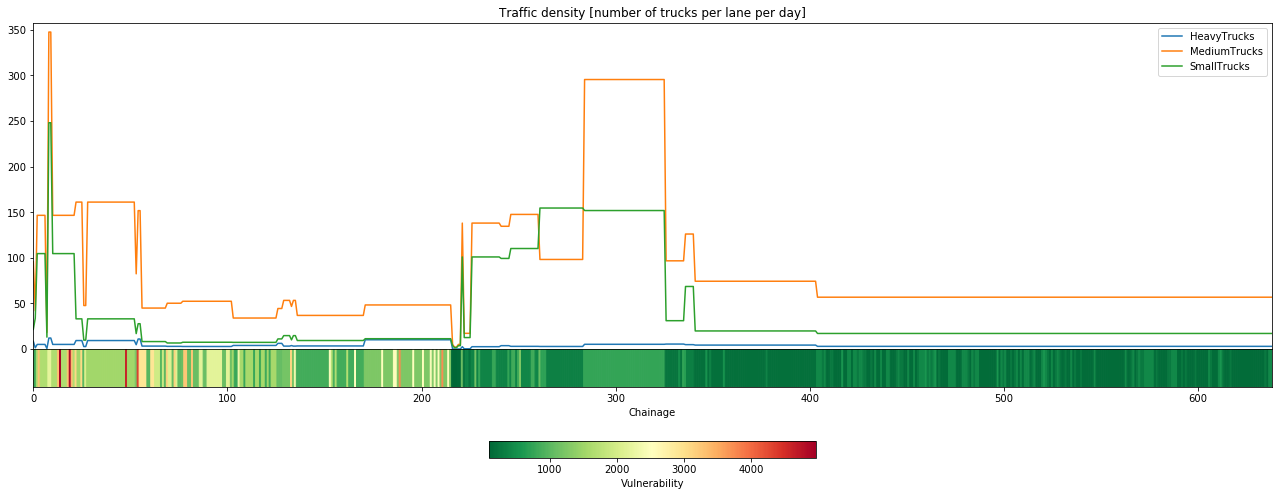

In [36]:
def plot_vulnerability():
    
    number_segments = len(road_segments)
    x = np.arange(number_segments)
    y1 = np.ones(number_segments)
    y2 = HeavyTrucks
    y3 = MediumTrucks
    y4 = SmallTrucks
    
    xmin = x.min()
    xmax = x.max()
    
    y2min = y2.min()
    y3min = y3.min()
    y4min = y4.min()
    ymin = min(y2min[0],y3min[0],y4min[0])
    
    y2max = y2.max()
    y3max = y3.max()
    y4max = y4.max()
    ymax = max(y2max[0],y3max[0],y4max[0])

    # Two subplots, the axes array is 1-d
    fig = plt.figure(figsize=(20, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    
    ax0 = plt.subplot(gs[0])
    ax0.plot(x, y2, label = 'HeavyTrucks')
    ax0.plot(x, y3, label = 'MediumTrucks')
    ax0.plot(x, y4, label = 'SmallTrucks')
    ax1 = plt.subplot(gs[1])
    plot = ax1.hexbin(x, y1, economic_vulnerability, gridsize=number_segments-1, cmap='RdYlGn_r')
    
    # Set titles of subplots
    ax0.set_title('Traffic density [number of trucks per lane per day]')
    
    # Change layout
    fig.subplots_adjust(hspace=0, left=0.07, right=0.93)
    
    ax0.get_yaxis().set_label('Ammount of trucks per day per lane')
    ax0.axis([xmin, xmax, 0, ymax+10])
    ax0.get_xaxis().set_visible(False)
    ax0.legend()
    ax1.axis([xmin, xmax, 0.9999, 1.0001])
    ax1.get_yaxis().set_visible(False)
                                
    # Set xlabel for graphs
    plt.xlabel('Chainage')
    if number_segments <= 100:
        plt.xticks(x,road_segments,rotation='vertical')

    cb = fig.colorbar(plot, ax=ax1, orientation='horizontal', pad=0.5)
    cb.set_label('Vulnerability')

plot_vulnerability()

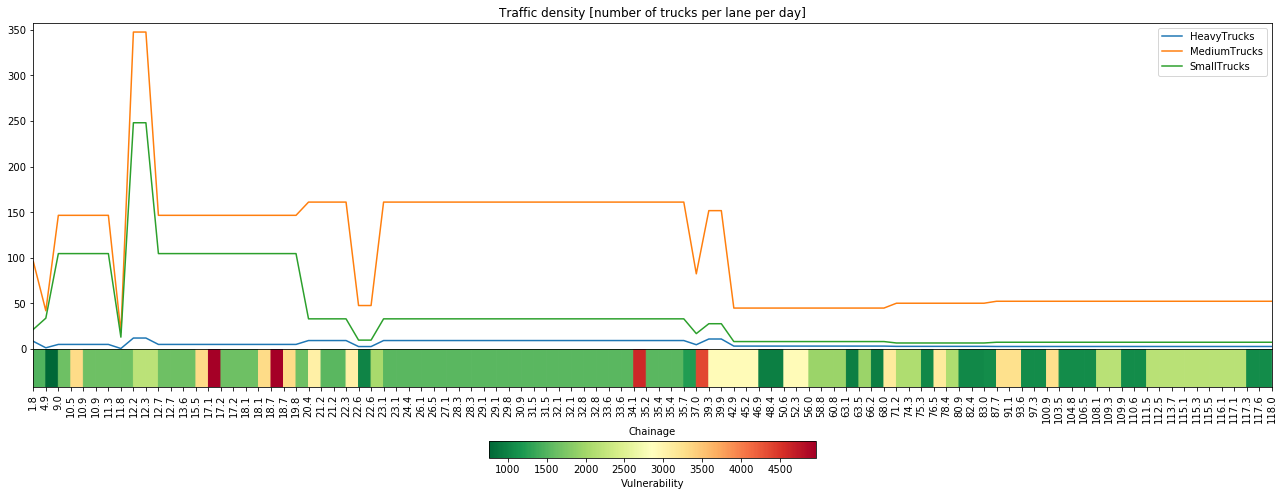

In [37]:
def plot_vulnerability():
    
    number_segments = len(part_roadsegments)
    x = np.arange(number_segments)
    y1 = np.ones(number_segments)
    y2 = part_HeavyTrucks
    y3 = part_MediumTrucks
    y4 = part_SmallTrucks
    
    xmin = x.min()
    xmax = x.max()
    
    y2min = y2.min()
    y3min = y3.min()
    y4min = y4.min()
    ymin = min(y2min[0],y3min[0],y4min[0])
    
    y2max = y2.max()
    y3max = y3.max()
    y4max = y4.max()
    ymax = max(y2max[0],y3max[0],y4max[0])

    # Two subplots, the axes array is 1-d
    fig = plt.figure(figsize=(20, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    
    ax0 = plt.subplot(gs[0])
    ax0.plot(x, y2, label = 'HeavyTrucks')
    ax0.plot(x, y3, label = 'MediumTrucks')
    ax0.plot(x, y4, label = 'SmallTrucks')
    ax1 = plt.subplot(gs[1])
    plot = ax1.hexbin(x, y1, part_vulnerability, gridsize=number_segments-1, cmap='RdYlGn_r')
    
    # Set titles of subplots
    ax0.set_title('Traffic density [number of trucks per lane per day]')
    
    # Change layout
    fig.subplots_adjust(hspace=0, left=0.07, right=0.93)
    
    ax0.get_yaxis().set_label('Ammount of trucks per day per lane')
    ax0.axis([xmin, xmax, 0, ymax+10])
    ax0.get_xaxis().set_visible(False)
    ax0.legend()
    ax1.axis([xmin, xmax, 0.9999, 1.0001])
    ax1.get_yaxis().set_visible(False)
                                
    # Set xlabel for graphs
    plt.xlabel('Chainage')
    if number_segments <= 100:
        plt.xticks(x,road_segments,rotation='vertical')

    cb = fig.colorbar(plot, ax=ax1, orientation='horizontal', pad=0.5)
    cb.set_label('Vulnerability')

plot_vulnerability()